**Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?
HR Analytics
Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.
Attrition in HR
Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.
How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.
Attrition affecting Companies
A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.**

In [911]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [912]:
#loading dataset
data=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [913]:
#Checking overvoew of the data
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [914]:
#Checking shape
data.shape

(1470, 35)

**So we can see that there are about 1470 columns and 35 rows in the dataset.**

In [915]:
#checking for columns
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

**So we can see that there are about 35 columns in the dataset.**

In [916]:
#Checking for null values
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

**so we can see that there are no null values present in the dataset.**

In [917]:
#Checking for duplicates
data.duplicated().sum()

0

**So we can see that there are no duplicates present in the dataset.**

In [918]:
#Checking types of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

**So we can see that most of the columns are integer data type that is 26 and about 9 columns have object data type that string.**

In [919]:
#checking for description
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


**Checking for unique values**

In [920]:
#Checking unique values
data['Age'].unique()

array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60], dtype=int64)

**This column indicates the different types of age people which are there in the dataset.**

In [902]:
#Checking for number of counts
data['Age'].nunique()

43

**There are about 43 unique values in this column.**

In [903]:
#Checking unique values
data['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

**This columns defines attrition.**

In [904]:
#Checking for number of counts
data['Attrition'].nunique()

2

**There are two unique values in this column.**

In [905]:
#Checking unique values
data['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

**This columns defines BusinessTravel.**

In [906]:
#Checking number of unique values
data['BusinessTravel'].nunique()

3

**There are two unique values in this column.**

In [511]:
#Checking unique values
data['DailyRate'].unique()

array([1102,  279, 1373, 1392,  591, 1005, 1324, 1358,  216, 1299,  809,
        153,  670, 1346,  103, 1389,  334, 1123, 1219,  371,  673, 1218,
        419,  391,  699, 1282, 1125,  691,  477,  705,  924, 1459,  125,
        895,  813, 1273,  869,  890,  852, 1141,  464, 1240, 1357,  994,
        721, 1360, 1065,  408, 1211, 1229,  626, 1434, 1488, 1097, 1443,
        515,  853, 1142,  655, 1115,  427,  653,  989, 1435, 1223,  836,
       1195, 1339,  664,  318, 1225, 1328, 1082,  548,  132,  746,  776,
        193,  397,  945, 1214,  111,  573, 1153, 1400,  541,  432,  288,
        669,  530,  632, 1334,  638, 1093, 1217, 1353,  120,  682,  489,
        807,  827,  871,  665, 1040, 1420,  240, 1280,  534, 1456,  658,
        142, 1127, 1031, 1189, 1354, 1467,  922,  394, 1312,  750,  441,
        684,  249,  841,  147,  528,  594,  470,  957,  542,  802, 1355,
       1150, 1329,  959, 1033, 1316,  364,  438,  689,  201, 1427,  857,
        933, 1181, 1395,  662, 1436,  194,  967, 14

**This columns defines daily rate.**

In [17]:
#Checking number of unique values
data['DailyRate'].nunique()

886

**There are two unique values in this column.**

In [18]:
#Checking unique values
data['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

**This columns defines departments.**

In [19]:
#Checking number of unique values
data['Department'].nunique()

3

**There are 3 unique values in this column.**

In [20]:
#Checking unique values
data['DistanceFromHome'].unique()

array([ 1,  8,  2,  3, 24, 23, 27, 16, 15, 26, 19, 21,  5, 11,  9,  7,  6,
       10,  4, 25, 12, 18, 29, 22, 14, 20, 28, 17, 13], dtype=int64)

**This columns defines DistanceFromHome.**

In [21]:
#Checking number of unique values
data['DistanceFromHome'].nunique()

29

**There are 29 unique values in this column.**

In [22]:
#Checking unique values
data['Education'].unique()

array([2, 1, 4, 3, 5], dtype=int64)

**This columns defines Education.**

In [23]:
#Checking number of unique values
data['Education'].nunique()

5

**There are 5 unique values in this column.**

In [24]:
#Checking unique values
data['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

**This columns defines EducationField.**

In [25]:
#Checking number of unique values
data['EducationField'].nunique()

6

**There are 6 unique values in this column.**

In [26]:
#Checking unique values
data['EmployeeCount'].unique()

array([1], dtype=int64)

**This columns defines EmployeeCount.**

In [27]:
#Checking number of unique values
data['EmployeeCount'].nunique()

1

**There is one unique values in this column.**

In [28]:
#Checking unique values
data['EmployeeNumber'].unique()

array([   1,    2,    4, ..., 2064, 2065, 2068], dtype=int64)

**This columns defines EmployeeNumber.**

In [29]:
#Checking number of unique values
data['EmployeeNumber'].nunique()

1470

**There are 1470 unique values in this column.**

In [30]:
#Checking unique values
data['EnvironmentSatisfaction'].unique()

array([2, 3, 4, 1], dtype=int64)

**This columns defines EnvironmentSatisfaction.**

In [31]:
#Checking number of unique values
data['EnvironmentSatisfaction'].nunique()

4

**There are 4 unique values in this column.**

In [32]:
#Checking unique values
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

**This columns defines Gender.**

In [33]:
#Checking number of unique values
data['Gender'].nunique()

2

**There are 2 unique values in this column.**

In [34]:
#Checking unique values
data['HourlyRate'].unique()

array([ 94,  61,  92,  56,  40,  79,  81,  67,  44,  84,  49,  31,  93,
        50,  51,  80,  96,  78,  45,  82,  53,  83,  58,  72,  48,  42,
        41,  86,  97,  75,  33,  37,  73,  98,  36,  47,  71,  30,  43,
        99,  59,  95,  57,  76,  87,  66,  55,  32,  52,  70,  62,  64,
        63,  60, 100,  46,  39,  77,  35,  91,  54,  34,  90,  65,  88,
        85,  89,  68,  69,  74,  38], dtype=int64)

**This columns defines HourlyRate.**

In [35]:
#Checking number of unique values
data['HourlyRate'].nunique()

71

**There are 71 unique values in this column.**

In [36]:
#Checking unique values
data['JobInvolvement'].unique()

array([3, 2, 4, 1], dtype=int64)

**This columns defines JobInvolvement.**

In [37]:
#Checking number of unique values
data['JobInvolvement'].nunique()

4

**There are 4 unique values in this column.**

In [38]:
#Checking unique values
data['JobLevel'].unique()

array([2, 1, 3, 4, 5], dtype=int64)

**This columns defines JobLevel.**

In [39]:
#Checking number of unique values
data['JobLevel'].nunique()

5

**There are 5 unique values in this column.**

In [40]:
#Checking unique values
data['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

**This columns defines JobRole.**

In [41]:
#Checking number of unique values
data['JobRole'].nunique()

9

**There are 9 unique values in this column.**

In [42]:
#Checking unique values
data['JobSatisfaction'].unique()

array([4, 2, 3, 1], dtype=int64)

**This columns defines JobSatisfaction.**

In [43]:
#Checking number of unique values
data['JobSatisfaction'].nunique()

4

**There are 4 unique values in this column.**

In [44]:
#Checking unique values
data['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

**This columns defines MaritalStatus.**

In [45]:
#Checking number of unique values
data['MaritalStatus'].nunique()

3

**There are 3 unique values in this column.**

In [46]:
#Checking unique values
data['MonthlyIncome'].unique()

array([5993, 5130, 2090, ..., 9991, 5390, 4404], dtype=int64)

**This columns defines MonthlyIncome.**

In [47]:
#Checking number of unique values
data['MonthlyIncome'].nunique()

1349

**There are 1349 unique values in this column.**

In [48]:
#Checking unique values
data['MonthlyRate'].unique()

array([19479, 24907,  2396, ...,  5174, 13243, 10228], dtype=int64)

**This columns defines MonthlyRate.**

In [49]:
#Checking number of unique values
data['MonthlyRate'].nunique()

1427

**There are 1427 unique values in this column.**

In [50]:
#Checking unique values
data['NumCompaniesWorked'].unique()

array([8, 1, 6, 9, 0, 4, 5, 2, 7, 3], dtype=int64)

**This columns defines NumCompaniesWorked.**

In [51]:
#Checking number of unique values
data['NumCompaniesWorked'].nunique()

10

**There are 10 unique values in this column.**

In [52]:
#Checking unique values
data['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

**This columns defines OverTime.**

In [53]:
#Checking number of unique values
data['OverTime'].nunique()

2

**There are 2 unique values in this column.**

In [54]:
#Checking unique values
data['PercentSalaryHike'].unique()

array([11, 23, 15, 12, 13, 20, 22, 21, 17, 14, 16, 18, 19, 24, 25],
      dtype=int64)

**This columns defines PercentSalaryHike.**

In [55]:
#Checking number of unique values
data['PercentSalaryHike'].nunique()

15

**There are 15 unique values in this column.**

In [56]:
#Checking unique values
data['PerformanceRating'].unique()

array([3, 4], dtype=int64)

**This columns defines PerformanceRating.**

In [57]:
#Checking number of unique values
data['PerformanceRating'].nunique()

2

**There are 2 unique values in this column.**

In [58]:
#Checking unique values
data['RelationshipSatisfaction'].unique()

array([1, 4, 2, 3], dtype=int64)

**This columns defines RelationshipSatisfaction.**

In [59]:
#Checking number of unique values
data['RelationshipSatisfaction'].nunique()

4

**There are 4 unique values in this column.**

In [60]:
#Checking unique values
data['StandardHours'].unique()

array([80], dtype=int64)

**This columns defines StandardHours.**

In [61]:
#Checking number of unique values
data['StandardHours'].nunique()

1

**There is 1 unique values in this column.**

In [62]:
#Checking unique values
data['StockOptionLevel'].unique()

array([0, 1, 3, 2], dtype=int64)

**This columns defines StockOptionLevel.**

In [63]:
#Checking number of unique values
data['StockOptionLevel'].nunique()

4

**There are 4 unique values in this column.**

In [64]:
#Checking unique values
data['TotalWorkingYears'].unique()

array([ 8, 10,  7,  6, 12,  1, 17,  5,  3, 31, 13,  0, 26, 24, 22,  9, 19,
        2, 23, 14, 15,  4, 29, 28, 21, 25, 20, 11, 16, 37, 38, 30, 40, 18,
       36, 34, 32, 33, 35, 27], dtype=int64)

**This columns defines TotalWorkingYears.**

In [65]:
#Checking number of unique values
data['TotalWorkingYears'].nunique()

40

**There are 40 unique values in this column.**

In [66]:
#Checking unique values
data['TrainingTimesLastYear'].unique()

array([0, 3, 2, 5, 1, 4, 6], dtype=int64)

**This columns defines TrainingTimesLastYear.**

In [67]:
#Checking number of unique values
data['TrainingTimesLastYear'].nunique()

7

**There are 7 unique values in this column.**

In [68]:
#Checking unique values
data['WorkLifeBalance'].unique()

array([1, 3, 2, 4], dtype=int64)

**This columns defines WorkLifeBalance.**

In [69]:
#Checking number of unique values
data['WorkLifeBalance'].nunique()

4

**There are 4 unique values in this column.**

In [70]:
#Checking unique values
data['YearsAtCompany'].unique()

array([ 6, 10,  0,  8,  2,  7,  1,  9,  5,  4, 25,  3, 12, 14, 22, 15, 27,
       21, 17, 11, 13, 37, 16, 20, 40, 24, 33, 19, 36, 18, 29, 31, 32, 34,
       26, 30, 23], dtype=int64)

**This columns defines YearsAtCompany.**

In [71]:
#Checking number of unique values
data['YearsAtCompany'].nunique()

37

**There are 37 unique values in this column.**

In [72]:
#Checking unique values
data['YearsInCurrentRole'].unique()

array([ 4,  7,  0,  2,  5,  9,  8,  3,  6, 13,  1, 15, 14, 16, 11, 10, 12,
       18, 17], dtype=int64)

**This columns defines YearsInCurrentRole.**

In [73]:
#Checking number of unique values
data['YearsInCurrentRole'].nunique()

19

**There are 19 unique values in this column.**

In [74]:
#Checking unique values
data['YearsSinceLastPromotion'].unique()

array([ 0,  1,  3,  2,  7,  4,  8,  6,  5, 15,  9, 13, 12, 10, 11, 14],
      dtype=int64)

**This columns defines YearsSinceLastPromotion.**

In [75]:
#Checking number of unique values
data['YearsSinceLastPromotion'].nunique()

16

**There are 16 unique values in this column.**

In [76]:
#Checking unique values
data['YearsWithCurrManager'].unique()

array([ 5,  7,  0,  2,  6,  8,  3, 11, 17,  1,  4, 12,  9, 10, 15, 13, 16,
       14], dtype=int64)

**This columns defines YearsWithCurrManager.**

In [77]:
#Checking number of unique values
data['YearsWithCurrManager'].nunique()

18

**There are 18 unique values in this column.**

**Checking for the value counts**

In [79]:
#checking value counts
data.Age.value_counts()

35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64

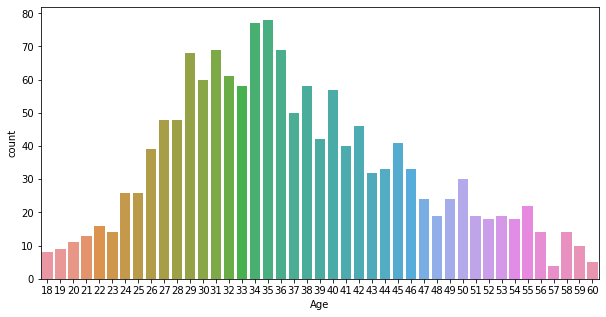

In [118]:
#plotting countplot
plt.figure(figsize=(10,5))
sns.countplot(x='Age',data=data)
plt.show()

**In this plot we can see the different age group of the employees, most of the employees are from age group 27 to 41 years.**

In [80]:
#checking value counts
data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

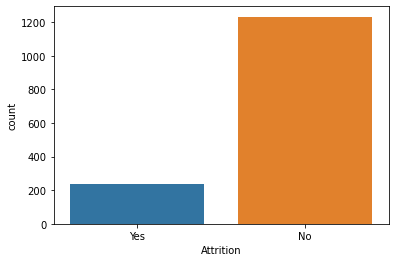

In [119]:
#plotting countplot
sns.countplot(x='Attrition',data=data)
plt.show()

**In this plot we can see that the data is not balanced as it is our label and we need to balance it further by using smote technique.**

In [81]:
#checking value counts
data.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

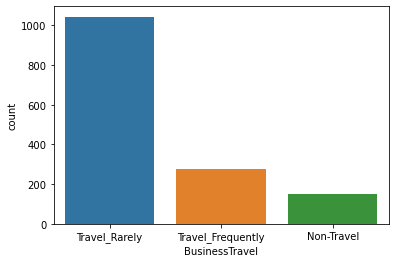

In [120]:
#plotting countplot
sns.countplot(x='BusinessTravel',data=data)
plt.show()

**In this plot we can see plot of business travels, we can see that most of the employees travels rarely, followed by the employees who travels frequently for business and least are the employees who does not travel.**

In [82]:
#checking value counts
data.DailyRate.value_counts()

691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: DailyRate, Length: 886, dtype: int64

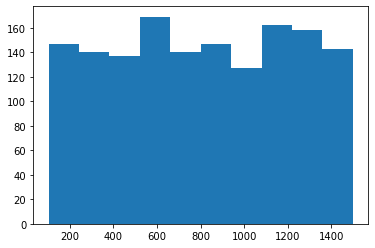

In [123]:
#plotting countplot
plt.hist(x='DailyRate',data=data)
plt.show()

**In this plot we can see the numbers of daily rates which are given to the employees,so in this we can see that 600 is the value which given to most  of the employees followed by 1200 and 1300.**

In [83]:
#checking value counts
data.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

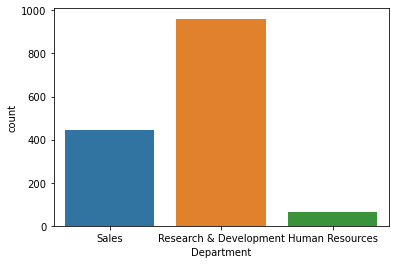

In [126]:
#plotting countplot
sns.countplot(x='Department',data=data)
plt.show()

**Most of the employees are from research and development department, followed by sales department and least employees are form HR department.**

In [84]:
#checking value counts
data.DistanceFromHome.value_counts()

2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     27
15     26
18     26
26     25
25     25
20     25
28     23
19     22
14     21
12     20
17     20
22     19
13     19
21     18
27     12
Name: DistanceFromHome, dtype: int64

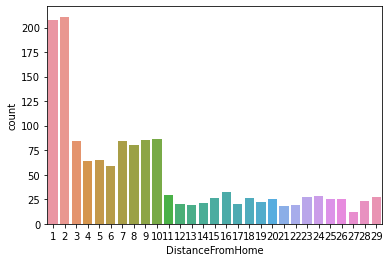

In [129]:
#plotting countplot
sns.countplot(x='DistanceFromHome',data=data)
plt.show()

**In this plot we can see the distance travelled by the employees from thier home, highest distance travelled by employees is 29 and least is 1, and most of the peoples distance from home is 2.**

In [85]:
#checking value counts
data.Education.value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

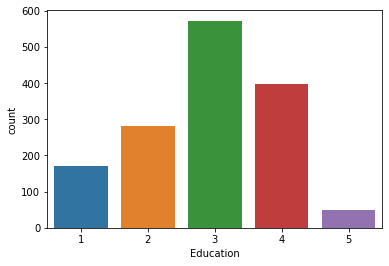

In [130]:
#plotting countplot
sns.countplot(x='Education',data=data)
plt.show()

**In this plot we are not able to analyse is this column is already encoded and i dont have any of this 1,2,3,4 and 5 and what they mean.**

In [86]:
#checking value counts
data.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

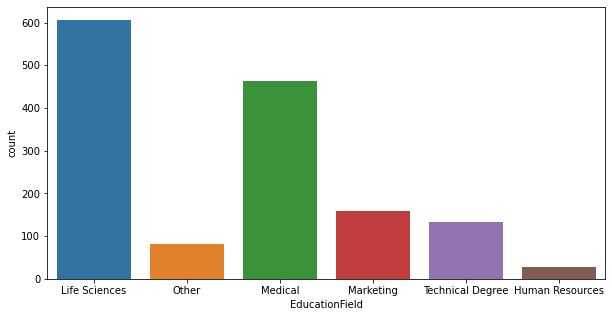

In [132]:
#plotting countplot
plt.figure(figsize=(10,5))
sns.countplot(x='EducationField',data=data)
plt.show()

**In this plot we can see the education field of the employees, most of the employees are from life scinece background, followed by medical,marketing,technical degree and least are from human resource background.**

In [87]:
#checking value counts
data.EmployeeCount.value_counts()

1    1470
Name: EmployeeCount, dtype: int64

**There are about 1470 employees.**

In [88]:
#checking value counts
data.EmployeeNumber.value_counts()

1       1
1391    1
1389    1
1387    1
1383    1
       ..
659     1
657     1
656     1
655     1
2068    1
Name: EmployeeNumber, Length: 1470, dtype: int64

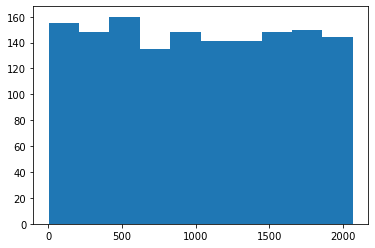

In [134]:
#plotting histogram
plt.hist(x='EmployeeNumber',data=data)
plt.show()

**In this plot we can the employee numbers of the employee.**

In [89]:
#checking value counts
data.EnvironmentSatisfaction.value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

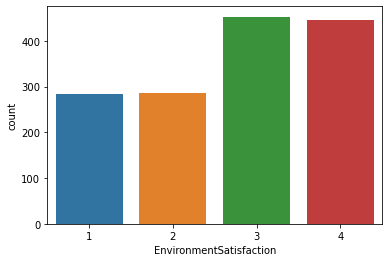

In [135]:
#plotting countplot
sns.countplot(x='EnvironmentSatisfaction',data=data)
plt.show()

**In this plot we can see the environment satisfacrion rating given by the employees,most of the employees have given a rating as 3 followed by 4.**

In [90]:
#checking value counts
data.Gender.value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

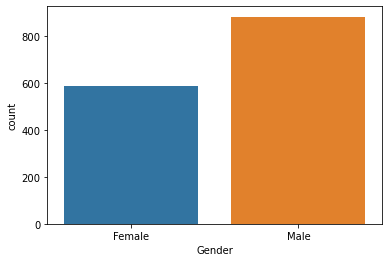

In [136]:
#plotting countplot
sns.countplot(x='Gender',data=data)
plt.show()

**In this plot we can see that there are more number male employees than female employees.**

In [91]:
#checking value counts
data.HourlyRate.value_counts()

66    29
98    28
42    28
48    28
84    28
      ..
31    15
53    14
68    14
38    13
34    12
Name: HourlyRate, Length: 71, dtype: int64

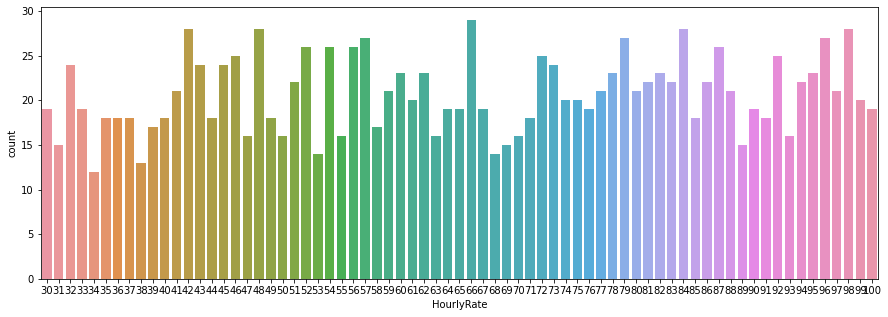

In [138]:
#plotting countplot
plt.figure(figsize=(15,5))
sns.countplot(x='HourlyRate',data=data)
plt.show()

**In this we can see the hourly rate paid to the employees,highest hourly rate paid is 100 and least paid is 30, most of the employees are paid 66 as hourly rate.**

In [92]:
#checking value counts
data.JobInvolvement.value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

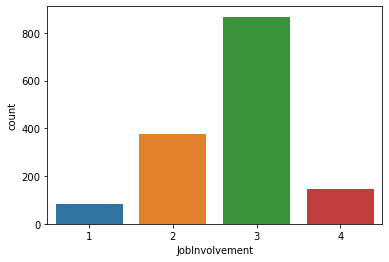

In [139]:
#plotting countplot
sns.countplot(x='JobInvolvement',data=data)
plt.show()

**In this plot we can see the jobInvolvemennt ratings,most of them have given 3 as the rating and least is given as 1.**

In [93]:
#checking value counts
data.JobLevel.value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

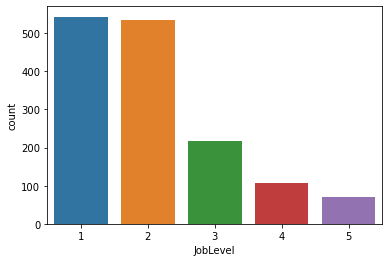

In [140]:
#plotting countplot
sns.countplot(x='JobLevel',data=data)
plt.show()

**In this plot we can see the jobe level of the employees, most of the employees are on job level 1 followed by level and least of the employees are on level 5.**

In [94]:
#checking value counts
data.JobRole.value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

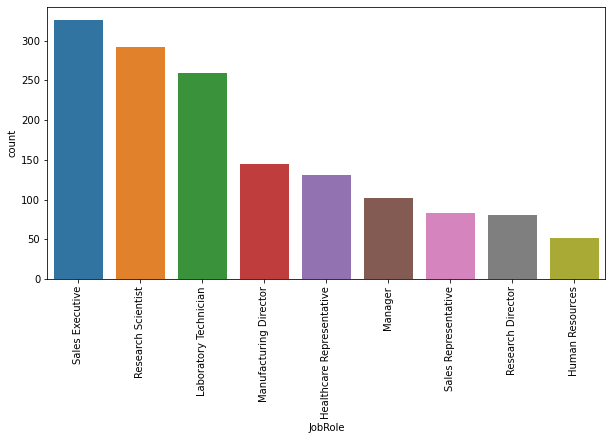

In [144]:
#plotting countplot
plt.figure(figsize=(10,5))
sns.countplot(x='JobRole',data=data)
plt.xticks(rotation='vertical')
plt.show()

**In this we can see that most of the employees are sales executive folowed by research scientist,laboratory technician.**

In [95]:
#checking value counts
data.JobSatisfaction.value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

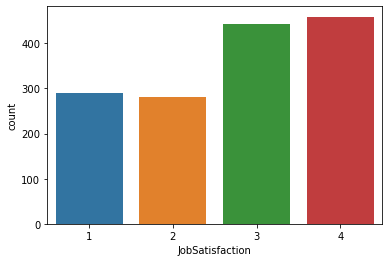

In [145]:
#plotting countplot
sns.countplot(x='JobSatisfaction',data=data)
plt.show()

**Most of the employees have given a rating of 4 for job satisfaction.**

In [96]:
#checking value counts
data.MaritalStatus.value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

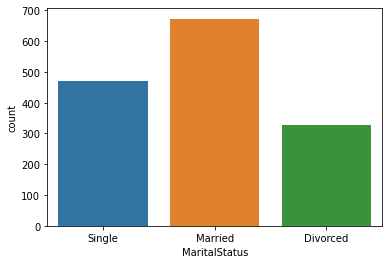

In [146]:
#plotting countplot
sns.countplot(x='MaritalStatus',data=data)
plt.show()

**Most of the employees are married, around 450 employees are single and around 300 employees are divorced.**

In [97]:
#checking value counts
data.MonthlyIncome.value_counts()

2342     4
6142     3
2741     3
2559     3
2610     3
        ..
7104     1
2773     1
19513    1
3447     1
4404     1
Name: MonthlyIncome, Length: 1349, dtype: int64

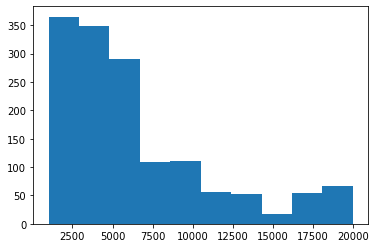

In [147]:
#plotting histogram
plt.hist(x='MonthlyIncome',data=data)
plt.show()

**In this plot we can see the monthly income of the employees,most number of employees are getting a monthly income of 2500 to 6000 and and very few employees are getting a monthly income of 10000 to 20000.**

In [98]:
#checking value counts
data.MonthlyRate.value_counts()

4223     3
9150     3
9558     2
12858    2
22074    2
        ..
14561    1
2671     1
5718     1
11757    1
10228    1
Name: MonthlyRate, Length: 1427, dtype: int64

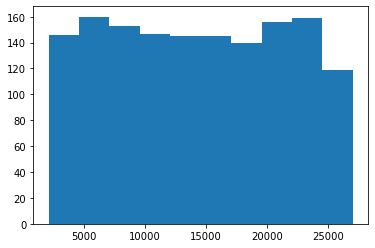

In [148]:
#plotting histogram
plt.hist(x='MonthlyRate',data=data)
plt.show()

**In this we can see the monthly rate given to employees, most of the employees are getting monthly rate 5000 and 23000.**

In [99]:
#checking value counts
data.NumCompaniesWorked.value_counts()

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64

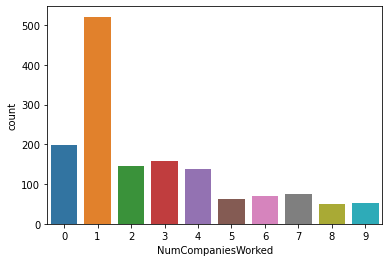

In [150]:
#plotting countplot
sns.countplot(x='NumCompaniesWorked',data=data)
plt.show()

**In this plot we can see the number of companies to which employees have worked before, so we can see that most of them have worked for 1 company before and very few of them have worked for more than 5 to 9 companies.** 

In [151]:
#checking value counts
data.Over18.value_counts()

Y    1470
Name: Over18, dtype: int64

**Every employees are over 18**

In [101]:
#checking value counts
data.OverTime.value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

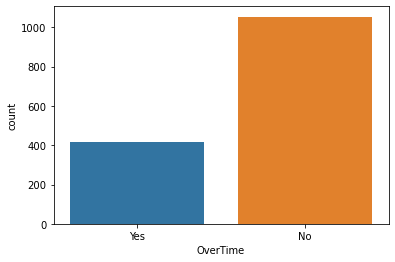

In [152]:
#plotting countplot
sns.countplot(x='OverTime',data=data)
plt.show()

**In this we can see most of the employees does not want overtime or they dont do overtime and around 400 employees they do or want overtime.**

In [102]:
#checking value counts
data.PercentSalaryHike.value_counts()

11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: PercentSalaryHike, dtype: int64

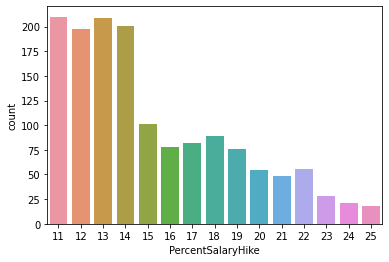

In [153]:
#plotting countplot
sns.countplot(x='PercentSalaryHike',data=data)
plt.show()

**In this we can see more than most of the employees got the salary hike of  11% and 13% and very few employees have a got a hike of more 23%.**

In [103]:
#checking value counts
data.PerformanceRating.value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

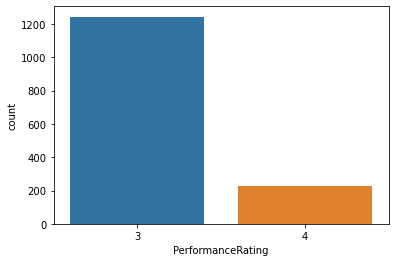

In [154]:
#plotting countplot
sns.countplot(x='PerformanceRating',data=data)
plt.show()

**Most of the emplpoyees have got 3 as performance rating and over 226 employees have got 4 as performance rating.**

In [104]:
#checking value counts
data.RelationshipSatisfaction.value_counts()

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

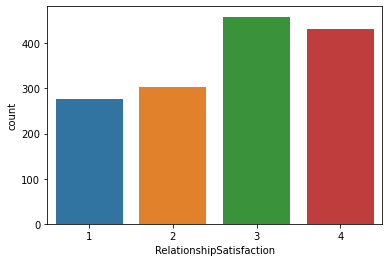

In [156]:
#plotting countplot
sns.countplot(x='RelationshipSatisfaction',data=data)
plt.show()

**In this we can see that most of them have given 3 rating for relationship satisfaction and over 400 of them have given 4  rating,over 300 have given 2 rating and less 300 employees have given 1 as relationship satisfaction rating.**

In [105]:
#checking value counts
data.StandardHours.value_counts()

80    1470
Name: StandardHours, dtype: int64

**I t is the standard hours for all the employees.**

In [106]:
#checking value counts
data.StockOptionLevel.value_counts()

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

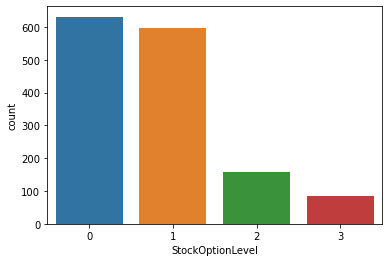

In [161]:
#plotting countplot
sns.countplot(x='StockOptionLevel',data=data)
plt.show()

**most of the them does have any stock option level, about 596 of them are on level 1, about 158 are on level 2 and 85 are on level 3.**

In [107]:
#checking value counts
data.TotalWorkingYears.value_counts()

10    202
6     125
8     103
9      96
5      88
7      81
1      81
4      63
12     48
3      42
15     40
16     37
11     36
13     36
21     34
17     33
2      31
14     31
20     30
18     27
19     22
23     22
22     21
24     18
25     14
28     14
26     14
0      11
29     10
31      9
32      9
30      7
33      7
27      7
36      6
34      5
37      4
35      3
40      2
38      1
Name: TotalWorkingYears, dtype: int64

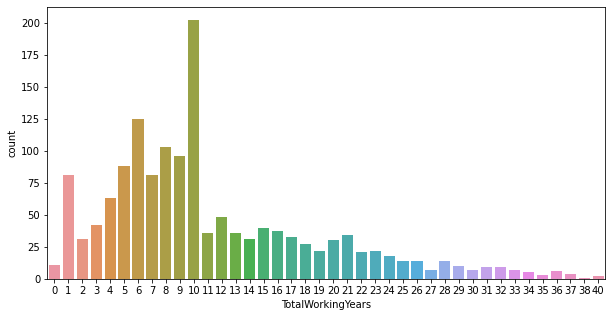

In [162]:
#plotting countplot
plt.figure(figsize=(10,5))
sns.countplot(x='TotalWorkingYears',data=data)
plt.show()

**Most of the people are working for 10 years, and very few people have worked  for more than 30 years and above.**

In [108]:
#checking value counts
data.TrainingTimesLastYear.value_counts()

2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: TrainingTimesLastYear, dtype: int64

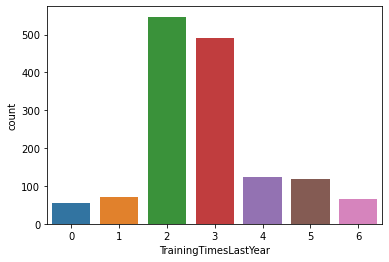

In [163]:
#plotting countplot
sns.countplot(x='TrainingTimesLastYear',data=data)
plt.show()

**In this we can see that last year more the 500 employees have attented trainin twice, around 470 employees have attented training 3 times a year.**

In [110]:
#checking value counts
data.YearsAtCompany.value_counts()

5     196
1     171
3     128
2     127
10    120
4     110
7      90
9      82
8      80
6      76
0      44
11     32
20     27
13     24
15     20
14     18
22     15
12     14
21     14
18     13
16     12
19     11
17      9
24      6
33      5
25      4
26      4
31      3
32      3
27      2
36      2
29      2
23      2
37      1
40      1
34      1
30      1
Name: YearsAtCompany, dtype: int64

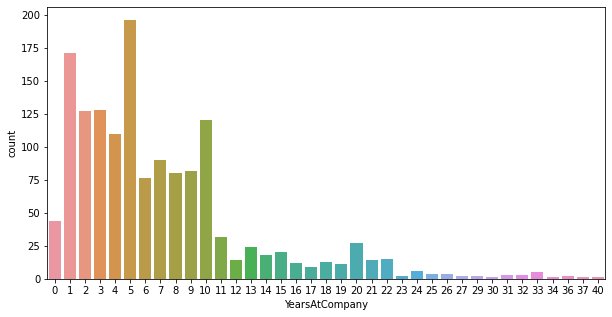

In [165]:
#plotting countplot
plt.figure(figsize=(10,5))
sns.countplot(x='YearsAtCompany',data=data)
plt.show()

**MOst of the employees are working at company for 5 years, and very few employees are working at comopanies for more than 20 years.**

In [111]:
#checking value counts
data.YearsInCurrentRole.value_counts()

2     372
0     244
7     222
3     135
4     104
8      89
9      67
1      57
6      37
5      36
10     29
11     22
13     14
14     11
12     10
15      8
16      7
17      4
18      2
Name: YearsInCurrentRole, dtype: int64

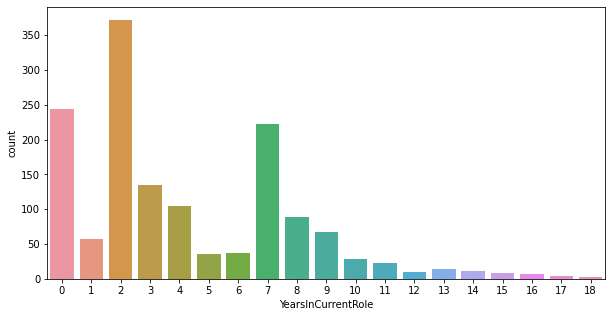

In [166]:
#plotting countplot
plt.figure(figsize=(10,5))
sns.countplot(x='YearsInCurrentRole',data=data)
plt.show()

**In this we can se employees who are there on there current role for how many years, so most of them are on the same role for 2 years and very few of them are on the same role for more 15 years.**

In [112]:
#checking value counts
data.YearsSinceLastPromotion.value_counts()

0     581
1     357
2     159
7      76
4      61
3      52
5      45
6      32
11     24
8      18
9      17
15     13
13     10
12     10
14      9
10      6
Name: YearsSinceLastPromotion, dtype: int64

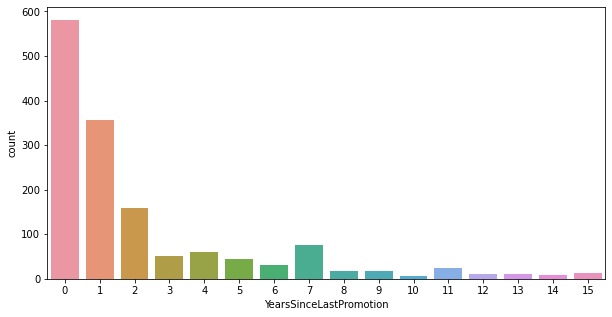

In [167]:
#plotting countplot
plt.figure(figsize=(10,5))
sns.countplot(x='YearsSinceLastPromotion',data=data)
plt.show()

**IN this mostwe can see that most of the employees have promotion recently.**

In [113]:
#checking value counts
data.YearsWithCurrManager.value_counts()

2     344
0     263
7     216
3     142
8     107
4      98
1      76
9      64
5      31
6      29
10     27
11     22
12     18
13     14
17      7
15      5
14      5
16      2
Name: YearsWithCurrManager, dtype: int64

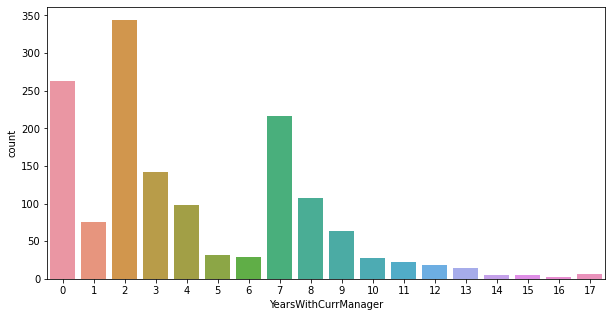

In [168]:
#plotting countplot
plt.figure(figsize=(10,5))
sns.countplot(x='YearsWithCurrManager',data=data)
plt.show()

**In this plot we can see that most of the employees have worked 2 years with the current manager.**

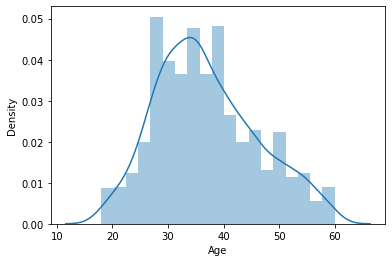

In [950]:
#plotting distribution plot
sns.distplot(data['Age'],kde=True)
plt.show()

**By looking at this plot we can see that the data is normalu distributed and i cant see any skewness.**

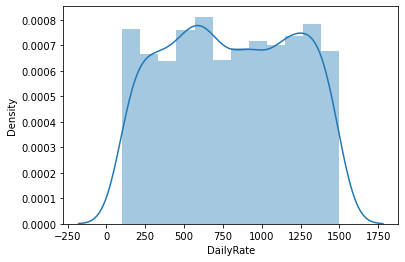

In [951]:
#plotting distribution plot
sns.distplot(data['DailyRate'],kde=True)
plt.show()

**By looking at this plot we can see that the data is normalu distributed and i cant see any skewness.**

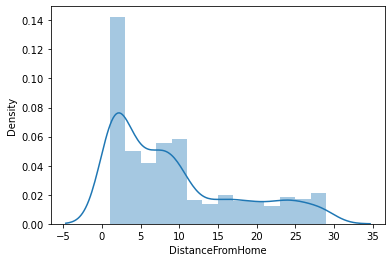

In [952]:
#plotting distribution plot
sns.distplot(data['DistanceFromHome'],kde=True)
plt.show()

**By looking at the plot we can see that the data is not normally distributed and skewness is present, further i will check the skewness and and if there is skewness i will treat it by using power transform method.**

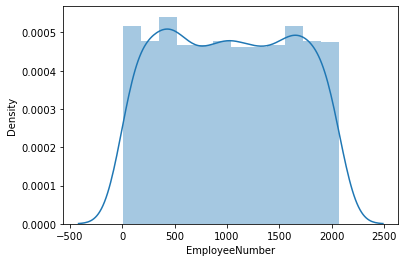

In [953]:
#plotting distribution plot
sns.distplot(data['EmployeeNumber'],kde=True)
plt.show()

**By looking at this plot we can see that the data is normalu distributed and i cant see any skewness.**

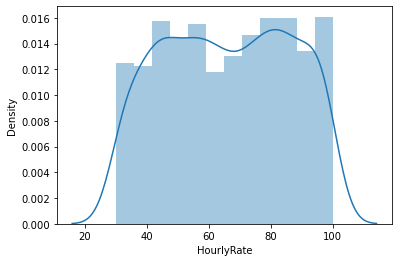

In [954]:
#plotting distribution plot
sns.distplot(data['HourlyRate'],kde=True)
plt.show()

**By looking at this plot we can see that the data is normalu distributed and i cant see any skewness.**

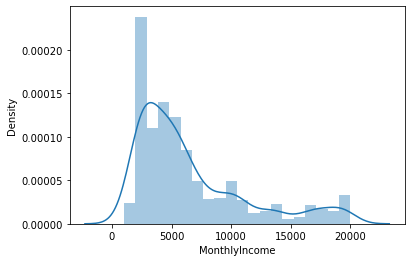

In [955]:
#plotting distribution plot
sns.distplot(data['MonthlyIncome'],kde=True)
plt.show()

**By looking at the plot we can see that the data is not normally distributed and skewness is present, further i will check the skewness and and if there is skewness i will treat it by using power transform method.**

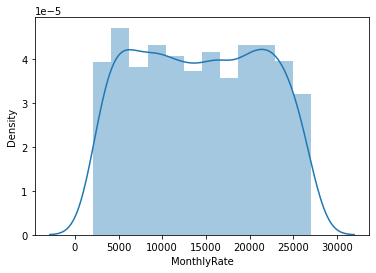

In [956]:
#plotting distribution plot
sns.distplot(data['MonthlyRate'],kde=True)
plt.show()

**By looking at this plot we can see that the data is normalu distributed and i cant see any skewness.**

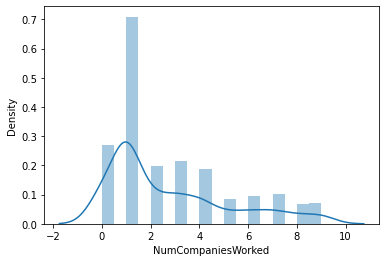

In [957]:
#plotting distribution plot
sns.distplot(data['NumCompaniesWorked'],kde=True)
plt.show()

**By looking at the plot we can see that the data is not normally distributed and skewness is present, further i will check the skewness and and if there is skewness i will treat it by using power transform method.**

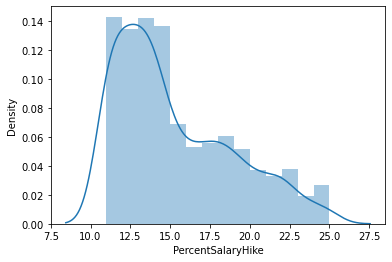

In [958]:
#plotting distribution plot
sns.distplot(data['PercentSalaryHike'],kde=True)
plt.show()

**By looking at the plot we can see that the data is not normally distributed and skewness is present, further i will check the skewness and and if there is skewness i will treat it by using power transform method.**

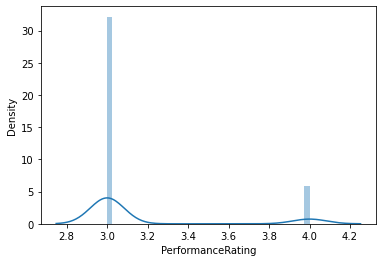

In [959]:
#plotting distribution plot
sns.distplot(data['PerformanceRating'],kde=True)
plt.show()

**By looking at the plot we can see that the data is not normally distributed and skewness is present, further i will check the skewness and and if there is skewness i will treat it by using power transform method.**

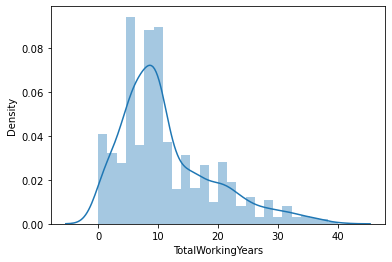

In [960]:
#plotting distribution plot
sns.distplot(data['TotalWorkingYears'],kde=True)
plt.show()

**By looking at the plot we can see that the data is not normally distributed and skewness is present, further i will check the skewness and and if there is skewness i will treat it by using power transform method.**

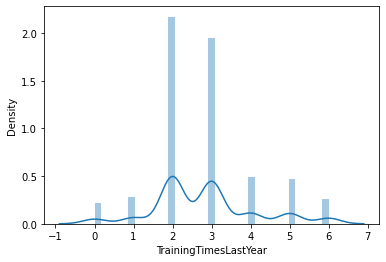

In [961]:
#plotting distribution plot
sns.distplot(data['TrainingTimesLastYear'],kde=True)
plt.show()

**By looking at the plot we can see that the data is not normally distributed and skewness is present, further i will check the skewness and and if there is skewness i will treat it by using power transform method.**

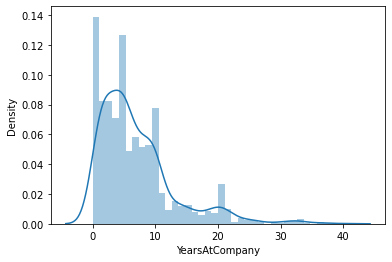

In [962]:
#plotting distribution plot
sns.distplot(data['YearsAtCompany'],kde=True)
plt.show()

**By looking at the plot we can see that the data is not normally distributed and skewness is present, further i will check the skewness and and if there is skewness i will treat it by using power transform method.**

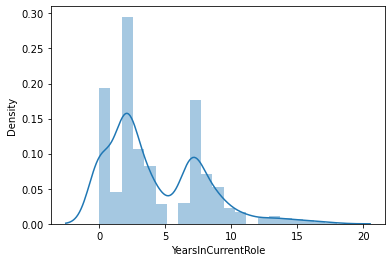

In [963]:
#plotting distribution plot
sns.distplot(data['YearsInCurrentRole'],kde=True)
plt.show()

**By looking at the plot we can see that the data is not normally distributed and skewness is present, further i will check the skewness and and if there is skewness i will treat it by using power transform method.**

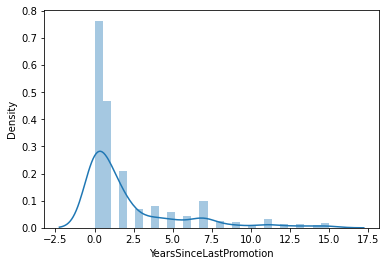

In [964]:
#plotting distribution plot
sns.distplot(data['YearsSinceLastPromotion'],kde=True)
plt.show()

**By looking at the plot we can see that the data is not normally distributed and skewness is present, further i will check the skewness and and if there is skewness i will treat it by using power transform method.**

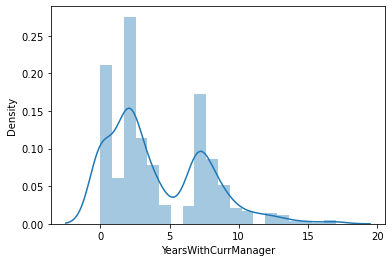

In [965]:
#plotting distribution plot
sns.distplot(data['YearsWithCurrManager'],kde=True)
plt.show()

**By looking at the plot we can see that the data is not normally distributed and skewness is present, further i will check the skewness and and if there is skewness i will treat it by using power transform method.**

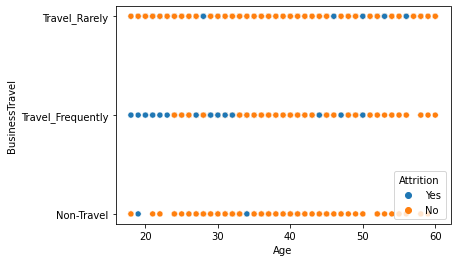

In [972]:
#plotting scatter plot
sns.scatterplot(x='Age',y='BusinessTravel',hue='Attrition',data=data)
plt.show()

**By looking at the plot we can see that business travel and age does not effect the attrition that much becausee we can see that in the plot.**

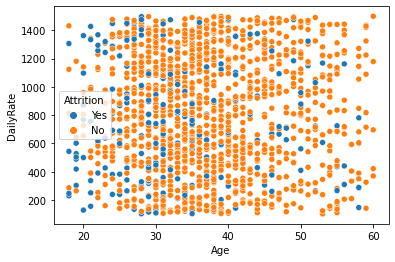

In [973]:
#plotting scatter plot
sns.scatterplot(x='Age',y='DailyRate',hue='Attrition',data=data)
plt.show()

**By looking at the plot we can see that its an 50-50 chance because daily rate also plays in important role.**

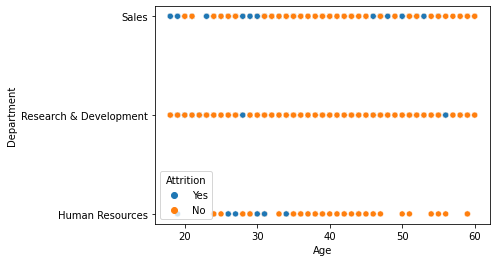

In [974]:
#plotting scatter plot
sns.scatterplot(x='Age',y='Department',hue='Attrition',data=data)
plt.show()

**By looking at the plot we can see that it does look that important for attrition.**

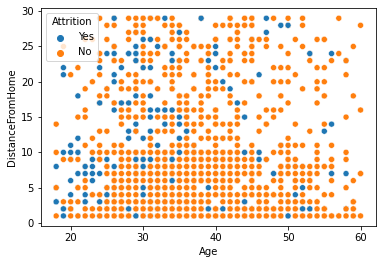

In [975]:
#plotting scatter plot
sns.scatterplot(x='Age',y='DistanceFromHome',hue='Attrition',data=data)
plt.show()

**By looking at the plot we can see that there may b a possibility that it can effect because distance from home also plays in important role.**

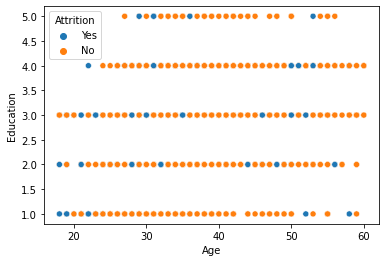

In [976]:
#plotting scatter plot
sns.scatterplot(x='Age',y='Education',hue='Attrition',data=data)
plt.show()

**By looking at the plot we can see that it is  not so important as we can see in the plot.**

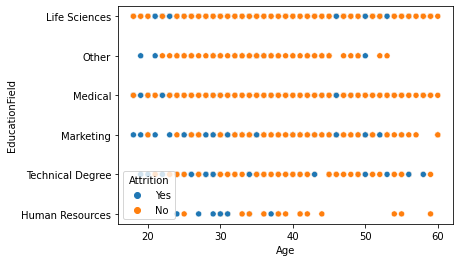

In [977]:
#plotting scatter plot
sns.scatterplot(x='Age',y='EducationField',hue='Attrition',data=data)
plt.show()

**By looking at the plot we can see that education field does effect that much to the attrition.**

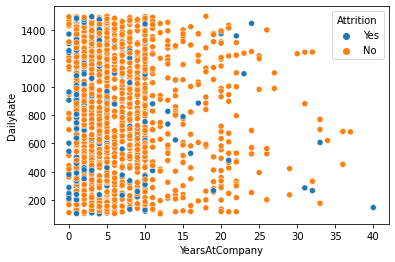

In [982]:
#plotting scatter plot
sns.scatterplot(x='YearsAtCompany',y='DailyRate',hue='Attrition',data=data)
plt.show()

**By looking at the plot we can see that we can see that ddaily rate and years at companny plays a major role becaue if the daily rate is not increasing than why will employee stay, so in this we can say that they are paid good.**

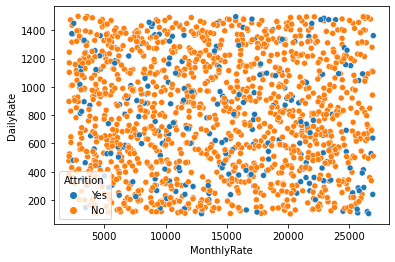

In [984]:
#plotting scatter plot
sns.scatterplot(x='MonthlyRate',y='DailyRate',hue='Attrition',data=data)
plt.show()

**By looking at the plot we can see that it plays an imoportant role as we can see in the plot.**

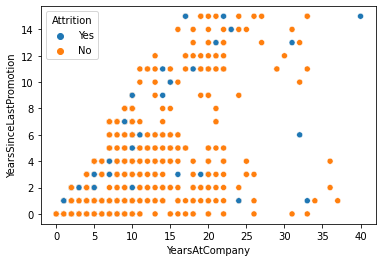

In [997]:
#plotting scatter plot
sns.scatterplot(x='YearsAtCompany',y='YearsSinceLastPromotion',hue='Attrition',data=data)
plt.show()

**By looking at the plot we can see that most chances of happening a attrition very less because if the years at company and yearsincelastpromotion.**

In [768]:
#Importing required libraries
from sklearn.preprocessing import LabelEncoder

In [769]:
#Encoding column
lab_enc=LabelEncoder()
df1=lab_enc.fit_transform(data['Attrition'])
df2=lab_enc.fit_transform(data['BusinessTravel'])
df3=lab_enc.fit_transform(data['Department'])
df4=lab_enc.fit_transform(data['EducationField'])
df5=lab_enc.fit_transform(data['Gender'])
df6=lab_enc.fit_transform(data['JobRole'])
df7=lab_enc.fit_transform(data['MaritalStatus'])
df8=lab_enc.fit_transform(data['Over18'])
df9=lab_enc.fit_transform(data['OverTime'])

In [770]:
#Transfering the data 
data['Attrition']=df1
data['BusinessTravel']=df2
data['Department']=df3
data['EducationField']=df4
data['Gender']=df5
data['JobRole']=df6
data['MaritalStatus']=df7
data['Over18']=df8
data['OverTime']=df9

In [771]:
#Checking whether the data is encoded or not
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


**so we can see that the data have been encoded.**

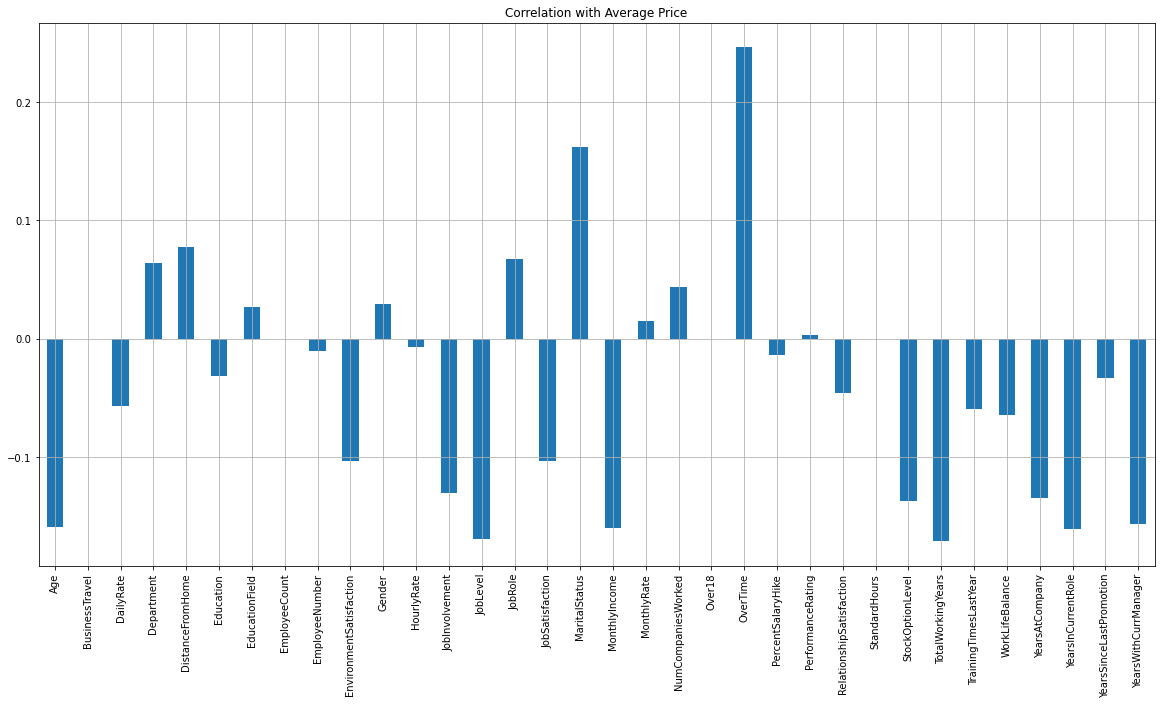

In [233]:
#Checking for correlation
data.drop(['Attrition'],axis=1).corrwith(data['Attrition']).plot(kind='bar',grid=True,figsize=(20,10),title='Correlation with Average Price')
plt.show()

* **By looking at the plot we can see monthly income,job level,age,total working years,years in current role and years with current manager are highlly negatively correlated to the label that is Attrition.**
* **Overtime and marital status are highly positively correlated to the label that is Attrition.**
* **Least correlated are business travel,employee count nad performance rating.**

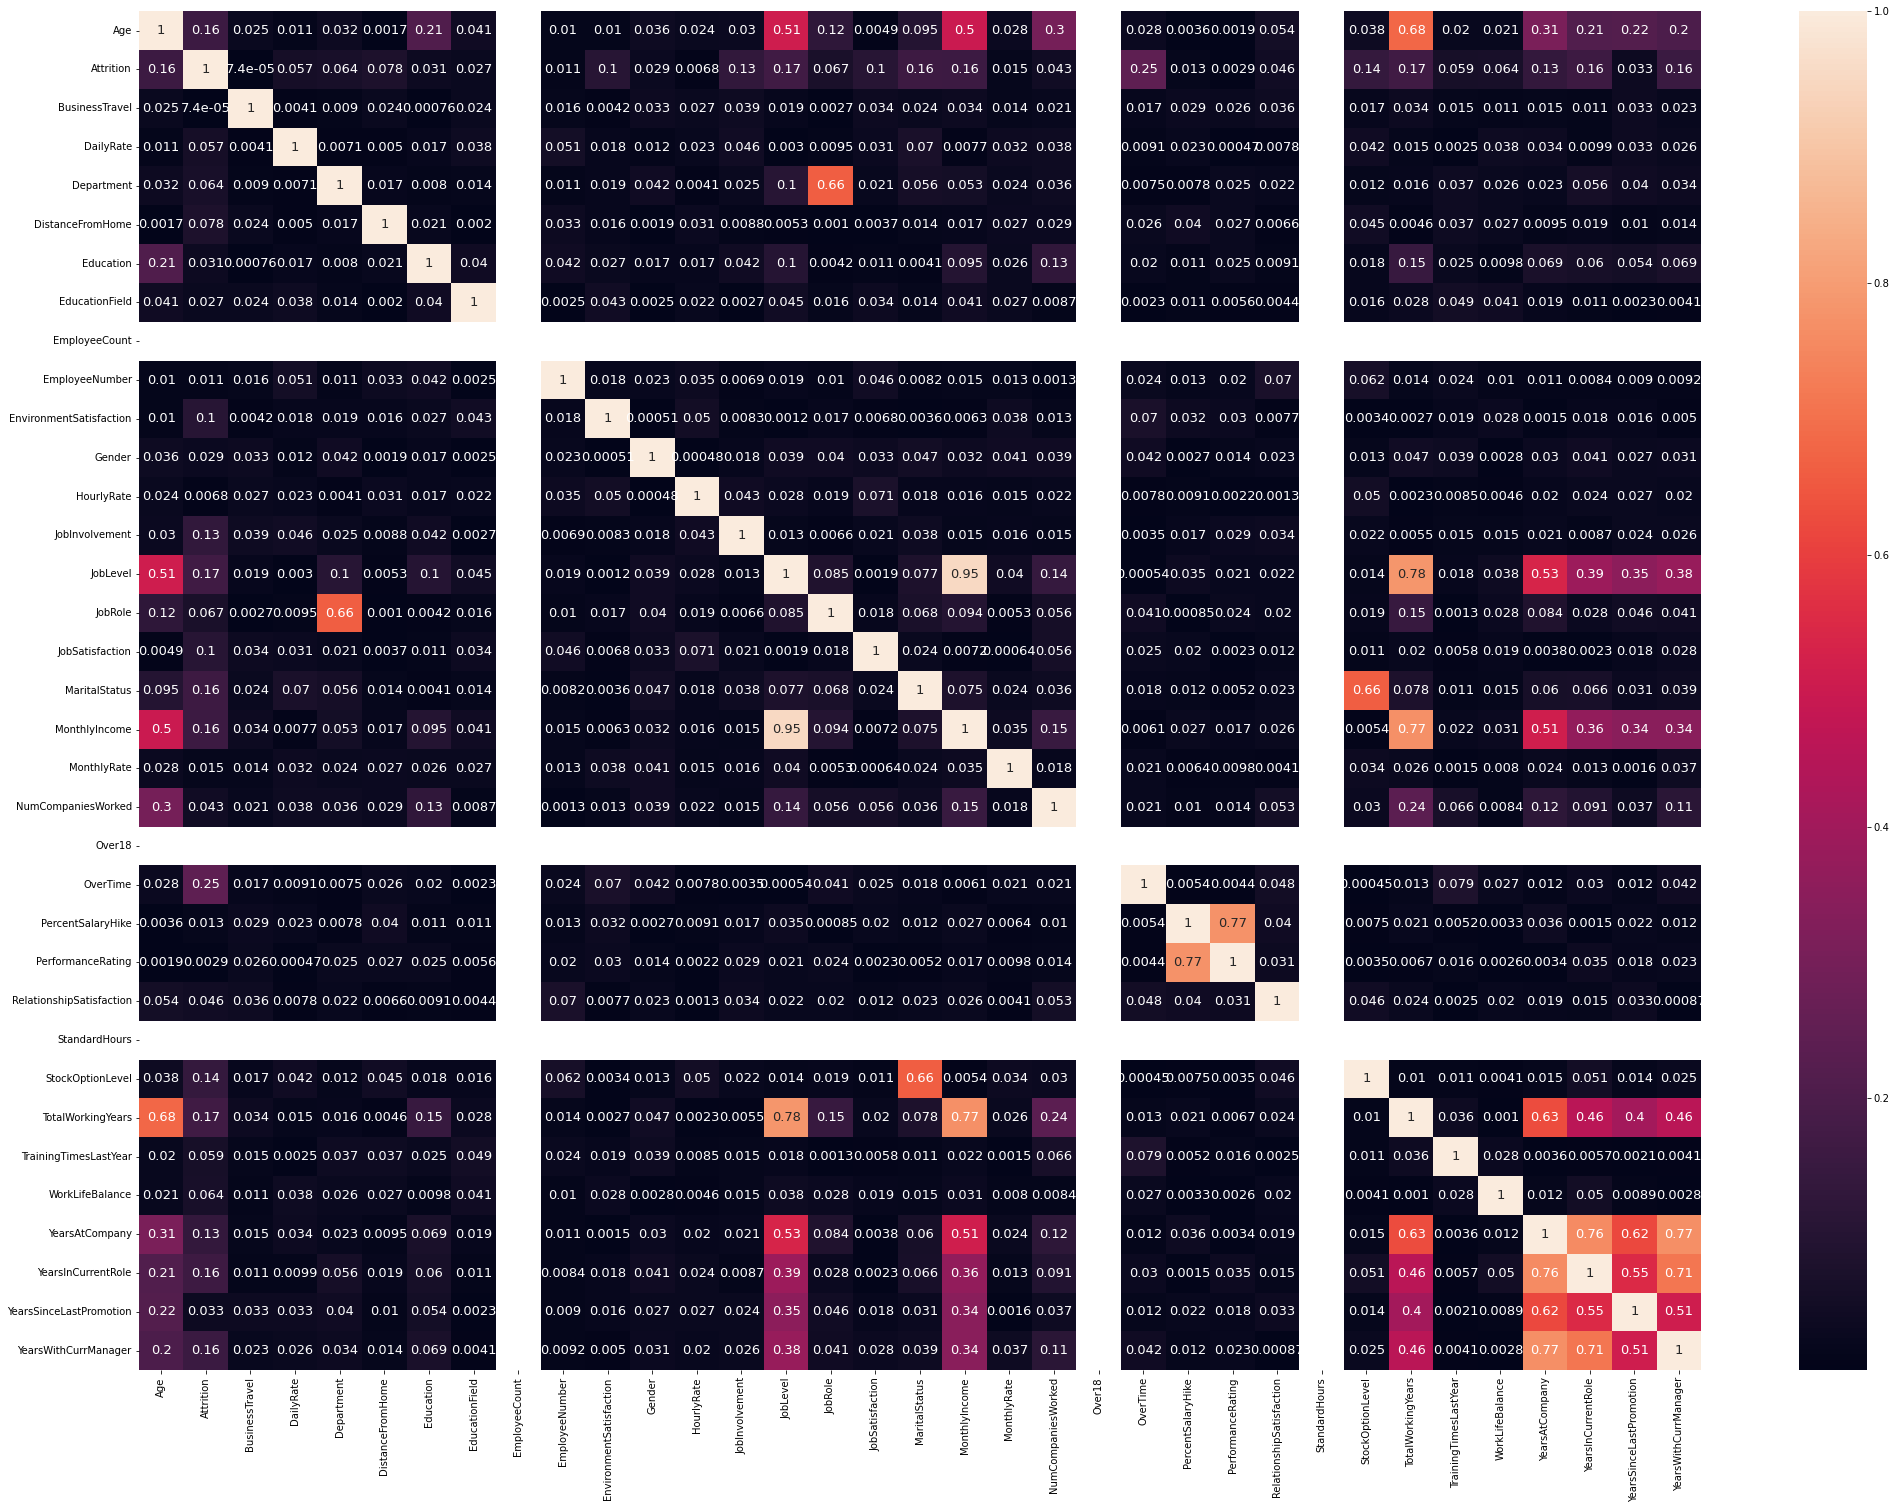

In [234]:
#Plotting heatmap
corr=data.corr().abs()
plt.figure(figsize=(35,25))
sns.heatmap(corr,annot=True,annot_kws={'size':13})
plt.show()

* **As i am considering percentage of 75%, meaning if the percentage is 75% and above i will consider them as they are multicorrelated.**
* **I can see joblevel is multi correlated with total working years and monthly income.**
* **Than monthly income is correlated with total working years and job level.**
* **percentsalary hike multicorrelated with performance rating.**
* **years at company is multicorrealted with years withcurmanager and years in current role.**
* **further i will plot scatter plot and will check the relationship between them also i will check vif.**

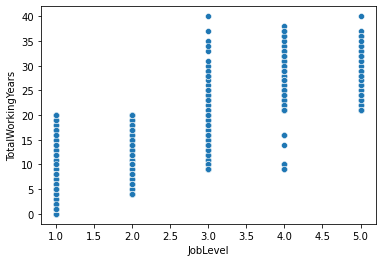

In [235]:
#plotting scatter plot
sns.scatterplot(x='JobLevel',y='TotalWorkingYears',data=data)
plt.show()

**By looking at the plot i can see some slight positive relationship but iam not sure, hence i will check it using vif.**

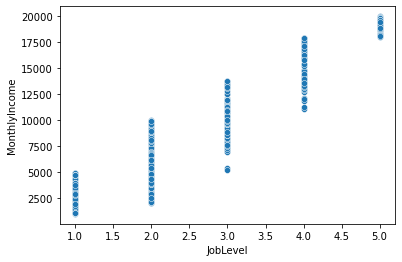

In [236]:
#plotting scatter plot
sns.scatterplot(x='JobLevel',y='MonthlyIncome',data=data)
plt.show()

**By looking at the plot i can see some  positive relationship but iam not sure, hence i will check it using vif.**

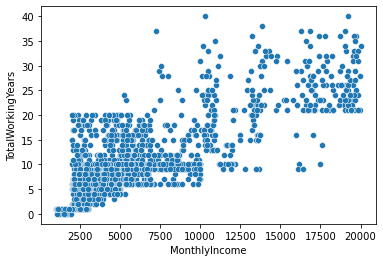

In [237]:
#plotting scatter plot
sns.scatterplot(x='MonthlyIncome',y='TotalWorkingYears',data=data)
plt.show()

**By looking at the plot i can see some slight positive relationship but iam not sure, hence i will check it using vif.**

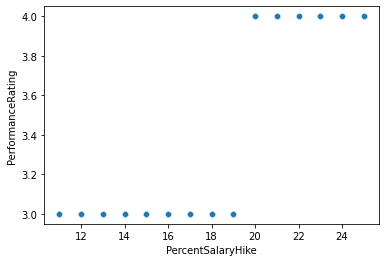

In [238]:
#plotting scatter plot
sns.scatterplot(x='PercentSalaryHike',y='PerformanceRating',data=data)
plt.show()

**By looking at the plot i cannot see any positive relationship but iam not sure, hence i will check it using vif.**

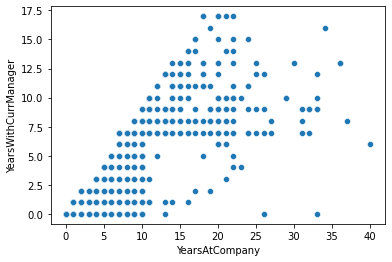

In [239]:
#plotting scatter plot
sns.scatterplot(x='YearsAtCompany',y='YearsWithCurrManager',data=data)
plt.show()

**By looking at the plot i cannot see any positive relationship but iam not sure, hence i will check it using vif.**

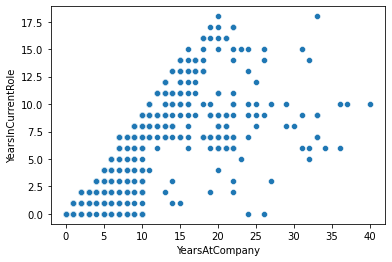

In [240]:
#plotting scatter plot
sns.scatterplot(x='YearsAtCompany',y='YearsInCurrentRole',data=data)
plt.show()

**By looking at the plot i cannot see positive relationship but iam not sure, hence i will check it using vif.**

**Since i am not sure abput the multicollinearity by looking at the plot further i will check it using vif.**

In [772]:
#checking skewness
data.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
S

**so we can see that in column DistanceFromHome,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating  ,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion and YearsWithCurrManager are having skewness. so by using power transform method i will treat the skewness.**

In [773]:
#Importing required libraries
from sklearn.preprocessing import power_transform

In [774]:
data[['DistanceFromHome','JobLevel','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]=power_transform(data[['DistanceFromHome','JobLevel','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']],method='yeo-johnson')
data[['DistanceFromHome','JobLevel','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

,DistanceFromHome,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,-1.494085,0.241622,0.285965,1.621331,-1.488918,-7.632783e-17,-1.087933,-0.244305,-2.579073,-2.144446,0.139692,0.205562,-1.094862,0.490147
1,0.243416,0.241622,0.052833,-0.571302,1.679689,4.232725e-16,0.548969,0.052495,0.217384,0.276821,0.762660,0.883888,0.096854,0.909635
2,-1.031215,-1.170135,-1.447625,1.271339,0.201133,-7.632783e-17,-1.087933,-0.410500,0.217384,0.276821,-2.229592,-1.596434,-1.094862,-1.550156
3,-0.700347,-1.170135,-0.863050,-0.571302,-1.488918,-7.632783e-17,-1.087933,-0.244305,0.217384,0.276821,0.482432,0.883888,0.905592,-1.550156
4,-1.031215,-1.170135,-0.567909,1.766182,-0.948760,-7.632783e-17,0.548969,-0.592063,0.217384,0.276821,-0.951540,-0.446645,0.607464,-0.406881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1.407126,0.241622,-1.076843,0.792695,0.719724,-7.632783e-17,0.548969,0.859893,0.217384,0.276821,-0.066114,-0.446645,-1.094862,-0.053000
1466,-0.050827,1.009822,1.002362,0.792695,0.201133,-7.632783e-17,0.548969,-0.090665,1.615639,0.276821,0.320677,0.883888,0.096854,0.909635
1467,-0.442291,0.241622,0.322118,-0.571302,1.281630,4.232725e-16,0.548969,-0.592063,-2.579073,0.276821,0.139692,-0.446645,-1.094862,-0.053000
1468,-1.031215,0.241622,0.127762,0.043423,-0.121307,-7.632783e-17,-1.087933,0.859893,0.217384,-1.108624,0.628829,0.682995,-1.094862,1.090110


In [775]:
#Checking for skewness
data.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome           -0.007468
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.103624
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.032831
MonthlyRate                 0.018578
NumCompaniesWorked          0.014814
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.116250
PerformanceRating           0.000000
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
S

**so we can see that the the skewness have been removed from all continuous data columns.**

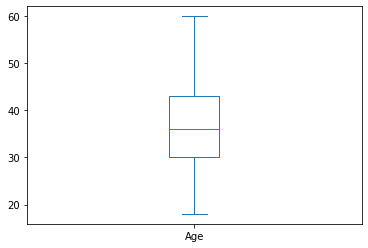

In [776]:
#Checking for outliers in Total Volume
data['Age'].plot.box()
plt.show()

**In this plot we can see that outliers are absent.**

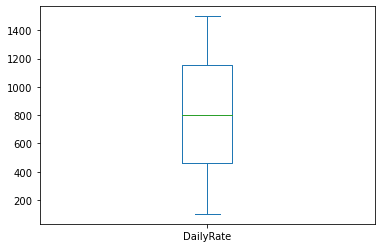

In [777]:
#Checking for outliers in Total Volume
data['DailyRate'].plot.box()
plt.show()

**In this plot we can see that outliers are absent.**

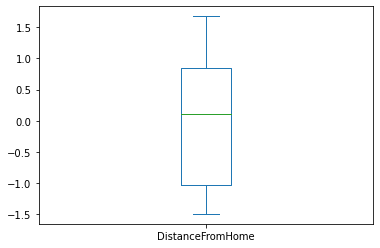

In [778]:
#Checking for outliers in Total Volume
data['DistanceFromHome'].plot.box()
plt.show()

**In this plot we can see that outliers are absent.**

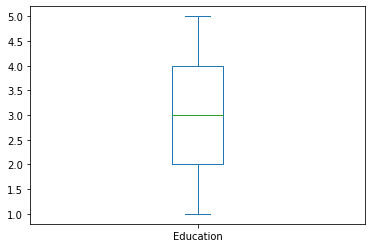

In [779]:
#Checking for outliers in Total Volume
data['Education'].plot.box()
plt.show()

**In this plot we can see that outliers are absent.**

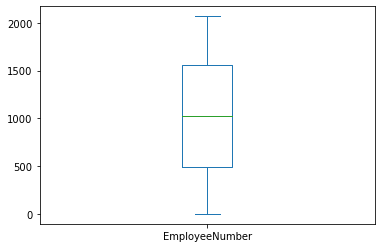

In [780]:
#Checking for outliers in Total Volume
data['EmployeeNumber'].plot.box()
plt.show()

**In this plot we can see that outliers are absent.**

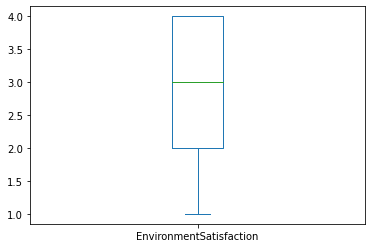

In [781]:
#Checking for outliers in Total Volume
data['EnvironmentSatisfaction'].plot.box()
plt.show()

**In this plot we can see that outliers are absent.**

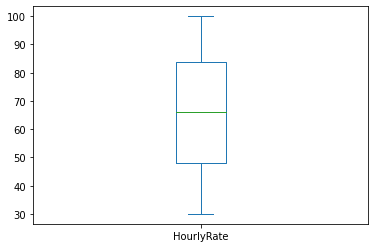

In [782]:
#Checking for outliers in Total Volume
data['HourlyRate'].plot.box()
plt.show()

**In this plot we can see that outliers are absent.**

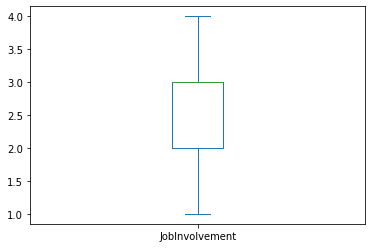

In [783]:
#Checking for outliers in Total Volume
data['JobInvolvement'].plot.box()
plt.show()

**In this plot we can see that outliers are absent.**

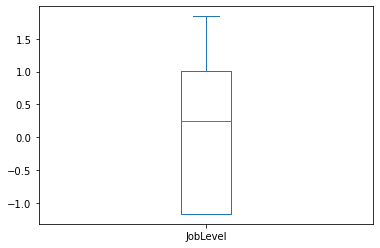

In [784]:
#Checking for outliers in Total Volume
data['JobLevel'].plot.box()
plt.show()

**In this plot we can see that outliers are absent.**

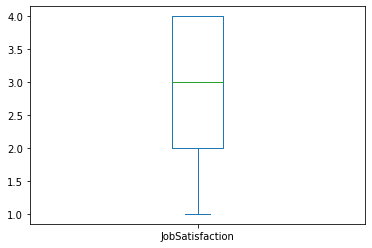

In [785]:
#Checking for outliers in Total Volume
data['JobSatisfaction'].plot.box()
plt.show()

**In this plot we can see that outliers are absent.**

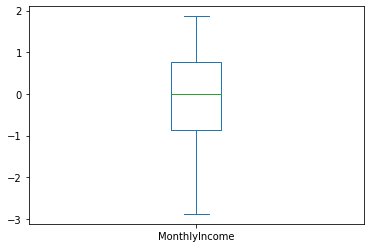

In [786]:
#Checking for outliers in Total Volume
data['MonthlyIncome'].plot.box()
plt.show()

**In this plot we can see that outliers are absent.**

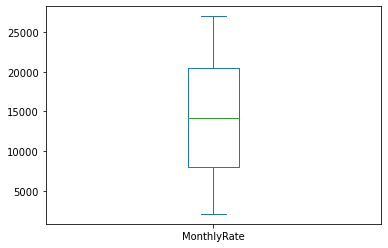

In [787]:
#Checking for outliers in Total Volume
data['MonthlyRate'].plot.box()
plt.show()

**In this plot we can see that outliers are absent.**

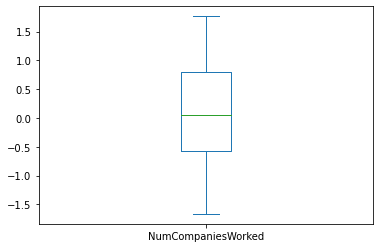

In [788]:
#Checking for outliers in Total Volume
data['NumCompaniesWorked'].plot.box()
plt.show()

**In this plot we can see that outliers are absent.**

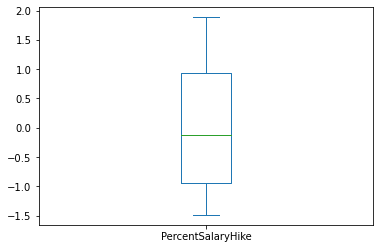

In [789]:
#Checking for outliers in Total Volume
data['PercentSalaryHike'].plot.box()
plt.show()

**In this plot we can see that outliers are absent.**

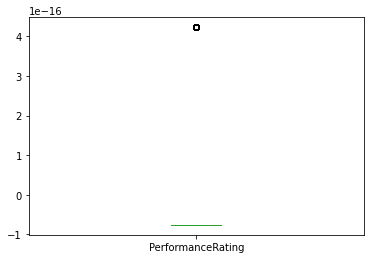

In [790]:
#Checking for outliers in Total Volume
data['PerformanceRating'].plot.box()
plt.show()

**In this plot we can see that outliers is present.**

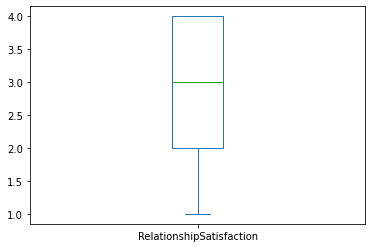

In [791]:
#Checking for outliers in Total Volume
data['RelationshipSatisfaction'].plot.box()
plt.show()

**In this plot we can see that outliers are absent.**

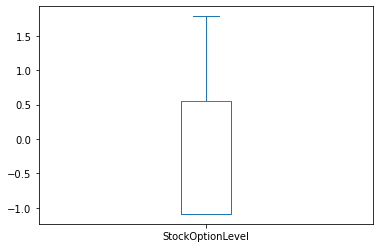

In [792]:
#Checking for outliers in Total Volume
data['StockOptionLevel'].plot.box()
plt.show()

**In this plot we can see that outliers are absent.**

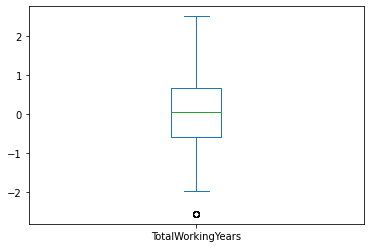

In [793]:
#Checking for outliers in Total Volume
data['TotalWorkingYears'].plot.box()
plt.show()

**In this plot we can see that outliers is present.**

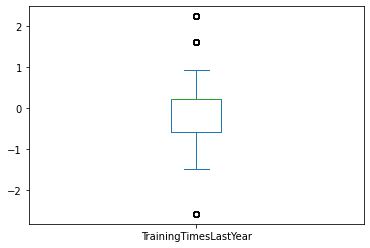

In [794]:
#Checking for outliers in Total Volume
data['TrainingTimesLastYear'].plot.box()
plt.show()

**In this plot we can see that outliers are present.**

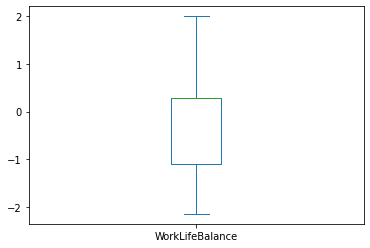

In [795]:
#Checking for outliers in Total Volume
data['WorkLifeBalance'].plot.box()
plt.show()

**In this plot we can see that outliers are absent.**

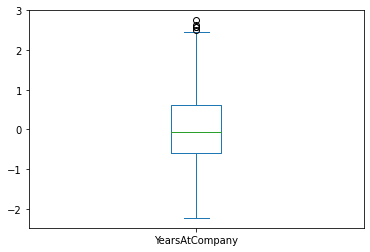

In [796]:
#Checking for outliers in Total Volume
data['YearsAtCompany'].plot.box()
plt.show()

**In this plot we can see that outliers are present.**

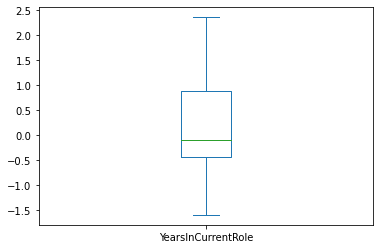

In [797]:
#Checking for outliers in Total Volume
data['YearsInCurrentRole'].plot.box()
plt.show()

**In this plot we can see that outliers are absent.**

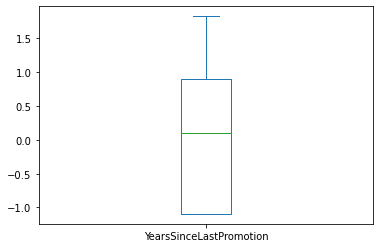

In [798]:
#Checking for outliers in Total Volume
data['YearsSinceLastPromotion'].plot.box()
plt.show()

**In this plot we can see that outliers are absent.**

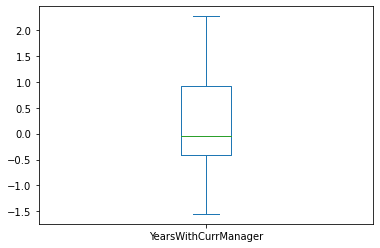

In [799]:
#Checking for outliers in Total Volume
data['YearsWithCurrManager'].plot.box()
plt.show()

**In this plot we can see that outliers are absent.**

In [800]:
#Importing required libraries
from scipy.stats import zscore

In [801]:
#Removing outliers
z_score=zscore(data[['PerformanceRating','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany']])
abs_z_score=np.abs(z_score)
threshold=3
z=(abs_z_score<3).all(axis=1)

In [802]:
data=data[z]

In [803]:
#checking rows and columns
data.shape

(1470, 35)

In [804]:
#Percentage Loss of Data
data_loss=((1470-1470)/1470)*100
print(f'Data Loss:{data_loss} %')

Data Loss:0.0 %


**so we can see that there are outliers present but they are below threshold of 3.so it was not dropped.**

In [805]:
#Dividing dataset into features and label
#Features
x=data.drop(['Attrition'],axis=1)
#Label
y=data['Attrition']

In [806]:
#Standardiziing the data
#Importing require libraries
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
x_scaler=Scaler.fit_transform(x)
x_scaler

array([[ 0.4463504 ,  0.59004834,  0.74252653, ...,  0.2055623 ,
        -1.09486169,  0.49014719],
       [ 1.32236521, -0.91319439, -1.2977746 , ...,  0.883888  ,
         0.09685415,  0.90963491],
       [ 0.008343  ,  0.59004834,  1.41436324, ..., -1.59643394,
        -1.09486169, -1.55015588],
       ...,
       [-1.08667552,  0.59004834, -1.60518328, ..., -0.44664507,
        -1.09486169, -0.05300033],
       [ 1.32236521, -0.91319439,  0.54667746, ...,  0.68299511,
        -1.09486169,  1.09011007],
       [-0.32016256,  0.59004834, -0.43256792, ..., -0.08961473,
         0.09685415, -0.40688122]])

In [807]:
x_scaler.shape

(1470, 34)

In [808]:
#Importing require libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [809]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaler,i)for i in range(x_scaler.shape[1])]
vif['feature']=x.columns
vif

,vif,feature
0,2.046835,Age
1,1.019133,BusinessTravel
2,1.024640,DailyRate
3,2.014533,Department
4,1.015303,DistanceFromHome
5,1.066286,Education
6,1.017548,EducationField
7,NaN,EmployeeCount
8,1.024885,EmployeeNumber
9,1.022190,EnvironmentSatisfaction


**In this we can see that joblevel,monthlyincome and yearsatcompany have value higher than 5, and in heatmap also they are showing multicollinearity, but i cant drop this feratures as they are more relates to the label.so further i am using feature selection method.**

In [517]:
#importing required libraries
from sklearn.feature_selection import SelectPercentile,chi2

In [518]:
spercentile=SelectPercentile(score_func=chi2,percentile=80)
spercentile=spercentile.fit(x,y)
cols=spercentile.get_support(indices=True)
print('Feature Index=',cols)
feature=x.columns[cols]
print('Features=',list[feature])

Feature Index= [ 0  2  3  4  5  6  8  9 10 12 13 14 15 16 17 18 19 21 24 26 27 28 29 30
 31 32 33]
Features= list[Index(['Age', 'DailyRate', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')]


In [519]:
df_scores=pd.DataFrame({
    'features':x.columns,
    'chi2score':spercentile.scores_,
    'pvalue':spercentile.pvalues_
})

In [520]:
df_scores.sort_values(by='chi2score',ascending=False)

,features,chi2score,pvalue
17,MonthlyIncome,1.279223e+05,0.000000e+00
18,MonthlyRate,1.196634e+03,3.287933e-262
2,DailyRate,9.565805e+02,4.923924e-210
27,TotalWorkingYears,2.307216e+02,4.149262e-52
30,YearsAtCompany,1.421001e+02,9.247066e-33
31,YearsInCurrentRole,1.175226e+02,2.205728e-27
33,YearsWithCurrManager,1.106715e+02,6.983363e-26
0,Age,8.415528e+01,4.574015e-20
21,OverTime,6.384507e+01,1.345990e-15
4,DistanceFromHome,6.377214e+01,1.396748e-15


In [560]:
new_feature=data[['Age', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole','JobSatisfaction','MaritalStatus','MonthlyIncome','MonthlyRate','NumCompaniesWorked','OverTime','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

In [561]:
new_feature

,Age,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,...,OverTime,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,2,-1.494085,2,1,1,2,0,3,...,1,1,-1.087933,-0.244305,-2.579073,-2.144446,0.139692,0.205562,-1.094862,0.490147
1,49,279,1,0.243416,1,1,2,3,1,2,...,0,4,0.548969,0.052495,0.217384,0.276821,0.762660,0.883888,0.096854,0.909635
2,37,1373,1,-1.031215,2,4,4,4,1,2,...,1,2,-1.087933,-0.410500,0.217384,0.276821,-2.229592,-1.596434,-1.094862,-1.550156
3,33,1392,1,-0.700347,4,1,5,4,0,3,...,1,3,-1.087933,-0.244305,0.217384,0.276821,0.482432,0.883888,0.905592,-1.550156
4,27,591,1,-1.031215,1,3,7,1,1,3,...,0,4,0.548969,-0.592063,0.217384,0.276821,-0.951540,-0.446645,0.607464,-0.406881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,1,1.407126,2,3,2061,3,1,4,...,0,3,0.548969,0.859893,0.217384,0.276821,-0.066114,-0.446645,-1.094862,-0.053000
1466,39,613,1,-0.050827,1,3,2062,4,1,2,...,0,1,0.548969,-0.090665,1.615639,0.276821,0.320677,0.883888,0.096854,0.909635
1467,27,155,1,-0.442291,3,1,2064,2,1,4,...,1,2,0.548969,-0.592063,-2.579073,0.276821,0.139692,-0.446645,-1.094862,-0.053000
1468,49,1023,2,-1.031215,3,3,2065,4,1,2,...,0,4,-1.087933,0.859893,0.217384,-1.108624,0.628829,0.682995,-1.094862,1.090110


In [558]:
#Using oversampling method-Smote method
#importing required libraries
from imblearn.over_sampling import SMOTE

In [559]:
over_samp=SMOTE(0.75)

In [562]:
x_new,y_new=over_samp.fit_resample(new_feature,y)

In [563]:
print('The number of classes before fit {}'.format(y.value_counts()))

The number of classes before fit 0    1233
1     237
Name: Attrition, dtype: int64


In [564]:
print('The number of classes after fit {}'.format(y_new.value_counts()))

The number of classes after fit 0    1233
1     924
Name: Attrition, dtype: int64


**As we have seen while plotting the counplot for label, we had seen that the label was not balanced so usong smote technique to balance the data.**

In [820]:
#Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score,plot_roc_curve,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

**Logistic Regression**

In [693]:
lr=LogisticRegression()

In [822]:
#using range fucntion to find the best random state using Logestic regression
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_train)
    y_pred=lr.predict(x_test)
    print(f'at random state{i},the training accuracy is:{accuracy_score(y_train,pred)*100}')
    print(f'at random state{i},the testing accuracy is:{accuracy_score(y_test,y_pred)*100}')
    print('\n')

at random state0,the training accuracy is:66.97588126159555
at random state0,the testing accuracy is:64.07407407407408


at random state1,the training accuracy is:64.87322201607915
at random state1,the testing accuracy is:67.03703703703704


at random state2,the training accuracy is:76.00494743351886
at random state2,the testing accuracy is:72.96296296296296


at random state3,the training accuracy is:72.35621521335807
at random state3,the testing accuracy is:72.4074074074074


at random state4,the training accuracy is:67.96536796536796
at random state4,the testing accuracy is:66.48148148148148


at random state5,the training accuracy is:72.0470006184292
at random state5,the testing accuracy is:69.62962962962963


at random state6,the training accuracy is:66.41929499072357
at random state6,the testing accuracy is:66.2962962962963


at random state7,the training accuracy is:71.30488559059988
at random state7,the testing accuracy is:73.51851851851852


at random state8,the training accur

**Taking random state as 86.**

In [823]:
#Training Testing and Spliting the data
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.25,random_state=103)

In [824]:
#Building Model to test unexposed data
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        pred=clf.predict(x_train)
        print('\n=====Train Score=====')
        print(f'Accuracy Score:{accuracy_score(y_train,pred)*100:.2f}%')
    elif train==False:
        y_pred=clf.predict(x_test)
        print('\n=====Test Score=====')
        print(f'Accuracy Score:{accuracy_score(y_test,y_pred)*100:.2f}%')
        print('\n Test Classification Report:\n',classification_report(y_test,y_pred,digits=2))
        print('\n Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
        print('\n F1 Score:\n',f1_score(y_test,y_pred,average='micro'))

In [825]:
#Training the data
lr.fit(x_train,y_train)

LogisticRegression()

In [826]:
#calling the function and passing the dataset for logistic regression
metric_score(lr,x_train,x_test,y_train,y_test,train=True)#for training
metric_score(lr,x_train,x_test,y_train,y_test,train=False)#for testing


=====Train Score=====
Accuracy Score:78.23%

=====Test Score=====
Accuracy Score:75.93%

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79       316
           1       0.71      0.71      0.71       224

    accuracy                           0.76       540
   macro avg       0.75      0.75      0.75       540
weighted avg       0.76      0.76      0.76       540


 Confusion Matrix:
 [[251  65]
 [ 65 159]]

 F1 Score:
 0.7592592592592593


In [827]:
#Checking Cross Validation score
#Importing required libraries
from sklearn.model_selection import cross_val_score

In [828]:
y_pred=lr.predict(x_test)
test_accuracy=accuracy_score(y_test,y_pred)

In [829]:
#Checking cross validation score
for j in range(2,6):
    cv_score=cross_val_score(lr,x_new,y_new,cv=j)
    cv_mean=cv_score.mean()
    print(f'at cross fold {j} the cv score is{cv_mean}and accuracy for the testing is {test_accuracy}')
    print('\n')

at cross fold 2 the cv score is0.33706052983161416and accuracy for the testing is 0.7592592592592593


at cross fold 3 the cv score is0.6096430227167362and accuracy for the testing is 0.7592592592592593


at cross fold 4 the cv score is0.5447991822991822and accuracy for the testing is 0.7592592592592593


at cross fold 5 the cv score is0.6991471169545416and accuracy for the testing is 0.7592592592592593




**Taking cv=5**

In [830]:
#plotting roc curve
fpr,tpr,threshold=roc_curve(y_test,y_pred)

In [831]:
print('FPR',fpr)
print('TPR',tpr)
print('Threshold',threshold)

FPR [0.        0.2056962 1.       ]
TPR [0.         0.70982143 1.        ]
Threshold [2 1 0]


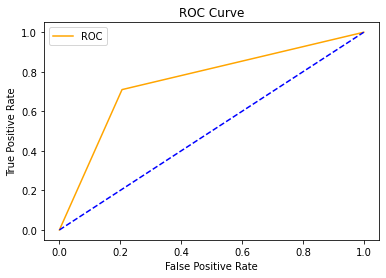

In [832]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**RandomForest Classifier**

In [580]:
#Instantiating the models
rfc=RandomForestClassifier()

In [833]:
#Training Testing and Spliting the data
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.25,random_state=103)

In [834]:
#Training the data
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [835]:
#calling the function and passing the dataset for logistic regression
metric_score(rfc,x_train,x_test,y_train,y_test,train=True)#for training
metric_score(rfc,x_train,x_test,y_train,y_test,train=False)#for testing


=====Train Score=====
Accuracy Score:100.00%

=====Test Score=====
Accuracy Score:90.74%

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       316
           1       0.95      0.82      0.88       224

    accuracy                           0.91       540
   macro avg       0.92      0.89      0.90       540
weighted avg       0.91      0.91      0.91       540


 Confusion Matrix:
 [[307   9]
 [ 41 183]]

 F1 Score:
 0.9074074074074074


In [836]:
#Checking cross validation score
cv_score=cross_val_score(rfc,x_new,y_new,cv=5).mean()
cv_score

0.786292644152273

In [837]:
#plotting roc curve
fpr,tpr,threshold=roc_curve(y_test,y_pred)

In [838]:
print('FPR',fpr)
print('TPR',tpr)
print('Threshold',threshold)

FPR [0.        0.2056962 1.       ]
TPR [0.         0.70982143 1.        ]
Threshold [2 1 0]


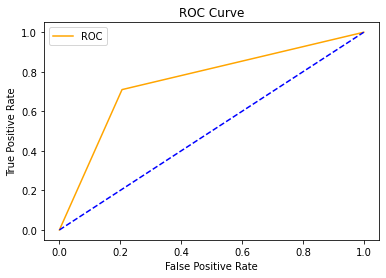

In [839]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Gradient Boosting Classifier**

In [840]:
#Initiating Gradient Boosting Regression
gb=GradientBoostingClassifier()

In [841]:
#Training Testing and Spliting the data
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.25,random_state=103)

In [842]:
#Training the data
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [843]:
#calling the function and passing the dataset for logistic regression
metric_score(gb,x_train,x_test,y_train,y_test,train=True)#for training
metric_score(gb,x_train,x_test,y_train,y_test,train=False)#for testing


=====Train Score=====
Accuracy Score:95.92%

=====Test Score=====
Accuracy Score:90.19%

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       316
           1       0.95      0.81      0.87       224

    accuracy                           0.90       540
   macro avg       0.91      0.89      0.90       540
weighted avg       0.91      0.90      0.90       540


 Confusion Matrix:
 [[306  10]
 [ 43 181]]

 F1 Score:
 0.9018518518518519


In [844]:
#Checking cross validation score
cv_score=cross_val_score(gb,x_new,y_new,cv=5).mean()
cv_score

0.6407450373807683

In [845]:
#plotting roc curve
fpr,tpr,threshold=roc_curve(y_test,y_pred)

In [846]:
print('FPR',fpr)
print('TPR',tpr)
print('Threshold',threshold)

FPR [0.        0.2056962 1.       ]
TPR [0.         0.70982143 1.        ]
Threshold [2 1 0]


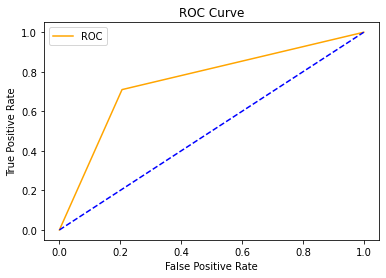

In [847]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Ada Boost Classifier**

In [848]:
ada=AdaBoostClassifier()

In [849]:
#Training Testing and Spliting the data
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.25,random_state=103)

In [850]:
#Training the data
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [851]:
#calling the function and passing the dataset for logistic regression
metric_score(ada,x_train,x_test,y_train,y_test,train=True)#for training
metric_score(ada,x_train,x_test,y_train,y_test,train=False)#for testing


=====Train Score=====
Accuracy Score:90.41%

=====Test Score=====
Accuracy Score:86.11%

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88       316
           1       0.85      0.81      0.83       224

    accuracy                           0.86       540
   macro avg       0.86      0.85      0.86       540
weighted avg       0.86      0.86      0.86       540


 Confusion Matrix:
 [[283  33]
 [ 42 182]]

 F1 Score:
 0.8611111111111112


In [852]:
#Checking cross validation score
cv_score=cross_val_score(ada,x_new,y_new,cv=5).mean()
cv_score

0.5605901435077769

In [853]:
#plotting roc curve
fpr,tpr,threshold=roc_curve(y_test,y_pred)

In [854]:
print('FPR',fpr)
print('TPR',tpr)
print('Threshold',threshold)

FPR [0.        0.2056962 1.       ]
TPR [0.         0.70982143 1.        ]
Threshold [2 1 0]


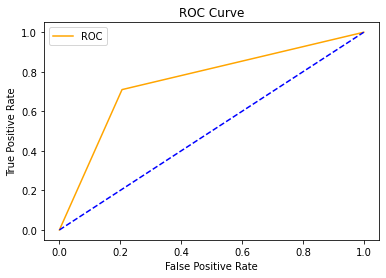

In [855]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [857]:
#Making dataframe of all the models
data=pd.DataFrame({
    'Models':['Logistic','Random Forest','Gradient Boosting','Ada'],
    'Training Score':[78.23,100,95.92,90.41],
    'Testing Score':[75.93,90.74,90.19,86.11],
    'Cross Val Score':[69.99,78.62,64.07,56.05],
    'F1 score':[75.92,90.74,90.18,86.11]
})
data

,Models,Training Score,Testing Score,Cross Val Score,F1 score
0,Logistic,78.23,75.93,69.99,75.92
1,Random Forest,100.00,90.74,78.62,90.74
2,Gradient Boosting,95.92,90.19,64.07,90.18
3,Ada,90.41,86.11,56.05,86.11


**Observation**
* **In this we can see that random forest has the highest training score followed by gradient boosting, ada boost and logistic.**
* **Random Forest has the highest testing score that is 90.74 followed by gradient boosting,ada boost and logistic regression.**
* **Randon forest have the highest cross validation score the is 78.62 followed by logistic regression, gradient boosting and ada boost.**
* **For randm forest, it has seen all the data and it has highest testing score and f1-score is also same as testing score.so that is why i would go forward with Random Forest Classifier.**

**Going forward with Random Forest Classifier as i have mentioned the reason in above observation.**

In [858]:
#Using Grid Search cv for hyperparameter tuning for Gradient Boosting
from sklearn.model_selection import GridSearchCV

In [865]:
param_grid=({
    'n_estimators': [100,200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,3,4,5],
    'criterion' :['gini', 'entropy']
})

In [866]:
grid_search=GridSearchCV(rfc,param_grid=param_grid,cv=5)

In [867]:
#Training
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200]})

In [868]:
#best Parameters
grid_search.best_params_ 

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [889]:
#Training with the best parameters
rfc1=RandomForestClassifier(criterion='gini',max_depth=5,max_features='sqrt',n_estimators=100)
rfc1.fit(x_train,y_train)

RandomForestClassifier(max_depth=5)

In [890]:
#calling the function and passing the dataset
metric_score(rfc1,x_train,x_test,y_train,y_test,train=True)#Training Score
metric_score(rfc1,x_train,x_test,y_train,y_test,train=False)#Testing Score


=====Train Score=====
Accuracy Score:89.42%

=====Test Score=====
Accuracy Score:84.63%

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88       316
           1       0.89      0.72      0.80       224

    accuracy                           0.85       540
   macro avg       0.86      0.83      0.84       540
weighted avg       0.85      0.85      0.84       540


 Confusion Matrix:
 [[295  21]
 [ 62 162]]

 F1 Score:
 0.8462962962962963


**So we can see that after doing hyper parameter tuning it is not giving us the better testing score, so will go forward with the model without hyperparameter tuning.**

In [873]:
#Checking cross validation score
cv_score=cross_val_score(rfc1,x_new,y_new,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.7413508636246455

In [874]:
y_pred_prob=rfc1.predict_proba(x_test)

In [876]:
#Checking AUC Score
roc_auc_score=roc_auc_score(y_test,y_pred)
roc_auc_score

0.7520626130198915

In [891]:
#saving the model
#Importing required libraries
import pickle
pickle.dump(rfc,open('HR Analytics Project','wb'))